## Filtering Code for ELEC-380
By Jian Ruan
Oct 3, 2022

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [14]:
def moving_average(x, N): # N is the size of our moving average
    y = np.zeros(x.shape) # make a y vector the size of x
    for i in range(len(x) - (N-1)):
        # we'll slide our moving average window along, returning results
        #  as soon as we've encountered enough data to fill our window
        start = i # our window will start at the i-th index         
        end = i + (N-1) # and end at the one that is N terms later
         # we make the answer line up with the last point that we used to calculate the window!
        y[i + (N-1)] = np.sum(x[start : (end+1)])/N # python ranges don't include end
    return y

In [15]:
FS = 100 # 100 Hz sampling rate
T = 1 # duration of sine wave
f = 5 # frequency
t = np.linspace(0, T, num=FS*T, endpoint=False)

x = np.sin(2*np.pi*t*f) # sinewave with frequency f

0.6313751514675047


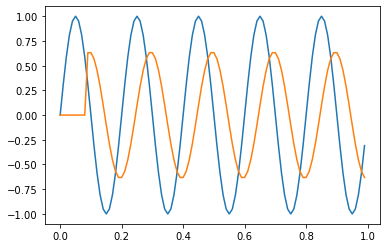

In [16]:
# Plot the original signal and the result of taking the moving average

plt.plot(t,x)
y = moving_average(x,10)
plt.plot(t, y)
print(np.max(y))

The moving average should be the same thing as [convolving](https://en.wikipedia.org/wiki/Convolution) the signal
with a square window kernel! 

100 109


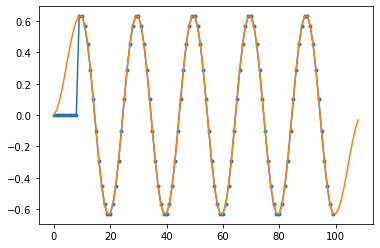

In [17]:
moving_average_kernel = np.ones(10) * 1/10
y2 = np.convolve(moving_average_kernel, x, mode='full')

plt.plot(y, '.-')
plt.plot(y2)

print(len(y), len(y2))

But notice that when you convolve, you end up with boundary conditions
such that your result is longer than your original signal. The convolution
formula assumes that all the values before the start of your signal are
zeros (which is why the orange curve ramps up) and the values after the
end of your signal are zero (which is why it continues after the end).

A moving average is a way to smooth out a signal. In general, when we process data
to generate something "better" by convolving with a kernel like the a moving average, 
the frequency content of the processed signal will be different. We refer to this kind
of processing as "filtering" the data. Recall that Fourier analysis decomposes a signal
into the sum of sinusoids. That means that we can calculate the "frequency response" of 
the filtering process by seeing how different sinusoids would respond. Let's do that now.

In [18]:
FS = 100 # 100 Hz sampling rate
frequencies = np.linspace(1, 49, num=250) # Frequency analysis only makes sense up to the Nyquist rate

T = 10 # duration of sine wave
t = np.linspace(0, T, num=FS*T, endpoint=False)

moving_average_window_size = 10

all_window_sizes = [1, 5, 10, 25]
frequency_response = np.zeros((len(frequencies), len(all_window_sizes)))


for window_index, window_size in enumerate(all_window_sizes): # loop over window sizes
    for frequency_index, f in enumerate(frequencies): # loop over frequencies
        x = np.sin(2*np.pi*t*f) # sinewave with frequency f
        y = moving_average(x, window_size)
        frequency_response[frequency_index, window_index] = np.max(y)

Text(0.5, 1.0, 'Amplitude of the Moving Average of a Sine Wave for Different Window Lengths')

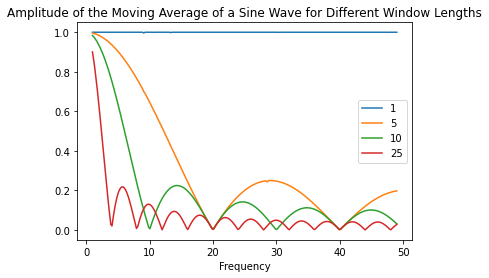

In [19]:
plt.plot(frequencies, frequency_response)
plt.legend(['1', '5', '10', '25'])
plt.gca().set_xlabel('Frequency')
plt.gca().set_title('Amplitude of the Moving Average of a Sine Wave for Different Window Lengths')

A really cool result from signal processing theory is that the Fourier transform
of the convolution of of two signals is the product of the Fourier transforms of
each individual one. That's relevant because it means that we can compute the
frequency response of our moving average by calculating the Fourier transform
of the moving average square window.

Text(0.5, 1.0, 'Frequency response for 25 point Moving Average')

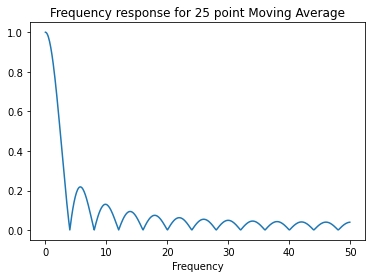

In [80]:
F = np.fft.fft(np.ones(25) * 1/25, n=1024) # 1024 is arbitrary - this sets the frequency resolution like we talked about in class
freqs = np.fft.fftfreq(1024) * 100
plt.plot(freqs[:512], np.abs(F)[:512]) # Remember we only need the first half because the second half is symmetric
plt.gca().set_xlabel('Frequency')
plt.title('Frequency response for 25 point Moving Average')

## Plot the the frequency responses for the following two filtering functions and answer the questions in the homework.

In [21]:
def approximate_derivative(x):
    # This function approximates the derivative of a signal
    y = np.zeros(x.shape) # make a y vector the size of x
    y[1:] = (x[1:] - x[:-1])/2 # y is the difference between time points, y[i] = (x[i] - x[i-1])/2
    # This code is the same as:
    # for i in range(len(x)-1):
    #     y[i+1] = (x[i+1] - x[i])/2
    return y

In [22]:
def smooth_moving_average(x):
    win = sig.hamming(10)
    y = np.convolve(win, x, mode='full')
    return y[:-9]

Standard ("causal") filtering introduces latency.

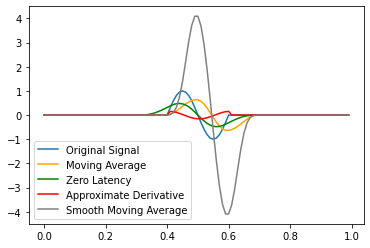

In [84]:
# Generate a pulse of data.
FS = 100 # 100 Hz sampling rate
T = 1 # duration of sine wave
f = 5 # frequency
t = np.linspace(0, T, num=FS*T, endpoint=False)
x = np.sin(2*np.pi*t*f) # sinewave with frequency f
x[t<0.4] = 0 # make it into a sinewave pulse
x[t>0.6] = 0

plt.plot(t,x, label = "Original Signal")

y = moving_average(x,10)
plt.plot(t, y, color='orange', label = "Moving Average")

y2 = sig.filtfilt(np.ones(10) * 1/10, 1, x)
plt.plot(t, y2, color='green', label = "Zero Latency")

y3 = approximate_derivative(x)
plt.plot(t, y3, color='red', label = "Approximate Derivative")

y4 = smooth_moving_average(x)
plt.plot(t, y4, color='grey', label = "Smooth Moving Average")

plt.legend()

Text(0.5, 1.0, 'Frequency response for 25 point Moving Average')

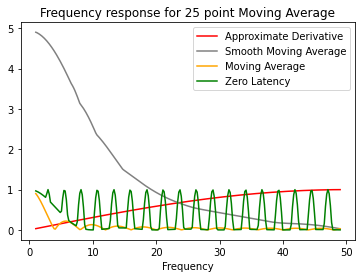

In [86]:
FS = 100 # 100 Hz sampling rate
freq = np.linspace(1, 49, num=250) # Frequency analysis only makes sense up to the Nyquist rate

T = 10 # duration of sine wave
t = np.linspace(0, T, num=FS*T, endpoint=False)

moving_average_window_size = 10

all_window_sizes = [25]
freq_response_ad = np.zeros((len(freq), len(all_window_sizes)))
freq_response_sma = np.zeros((len(freq), len(all_window_sizes)))
freq_response_ma = np.zeros((len(freq), len(all_window_sizes)))
freq_response_zl = np.zeros((len(freq), len(all_window_sizes)))

for window_index, window_size in enumerate(all_window_sizes): # loop over window sizes
    for freq_index, f in enumerate(freq): # loop over frequencies
        x = np.sin(2*np.pi*t*f) # sinewave with frequency f
        y_ad = approximate_derivative(x)
        y_sma = smooth_moving_average(x)
        y_ma = moving_average(x, window_size)
        y_zl = sig.filtfilt(np.ones(10) * 1/10, 1, x)
        
        freq_response_ad[freq_index, window_index] = np.max(y_ad)
        freq_response_sma[freq_index, window_index] = np.max(y_sma)
        freq_response_ma[freq_index, window_index] = np.max(y_ma)
        freq_response_zl[freq_index, window_index] = np.max(y_zl)
        
        
        
plt.plot(frequencies, freq_response_ad, color = "red", label = "Approximate Derivative")
plt.plot(frequencies, freq_response_sma, color = "grey",label = "Smooth Moving Average")
plt.plot(frequencies, freq_response_ma, color = "orange", label = "Moving Average")
plt.plot(frequencies, freq_response_zl, color = "green", label = "Zero Latency")
plt.legend()
plt.gca().set_xlabel('Frequency')
plt.gca().set_title('Frequency response for 25 point Moving Average')